<a href="https://colab.research.google.com/github/NourBerakdar/Music-Genre-Classification/blob/main/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# It's a classification project that classifies the types of class of music dependent on the other features.

# Dataset is in kaggle site:
https://www.kaggle.com/competitions/shai-music-genre-classification

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c shai-music-genre-classification


#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Saving kaggle.json to kaggle.json
kaggle.json
  0% 0.00/981k [00:00<?, ?B/s]
100% 981k/981k [00:00<00:00, 119MB/s]
Archive:  shai-music-genre-classification.zip
  inflating: sample_submission (2).csv  
  inflating: test (2).csv            
  inflating: train (1).csv           


# Analysis + Visualization Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("/content/train (1).csv")
test=pd.read_csv("/content/test (2).csv")

data.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [ ]:
data.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [ ]:
data.isnull().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [ ]:
test.isnull().sum()

Id                      0
Artist Name             0
Track Name              0
Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [ ]:
data.shape

(14396, 18)

Visualize data

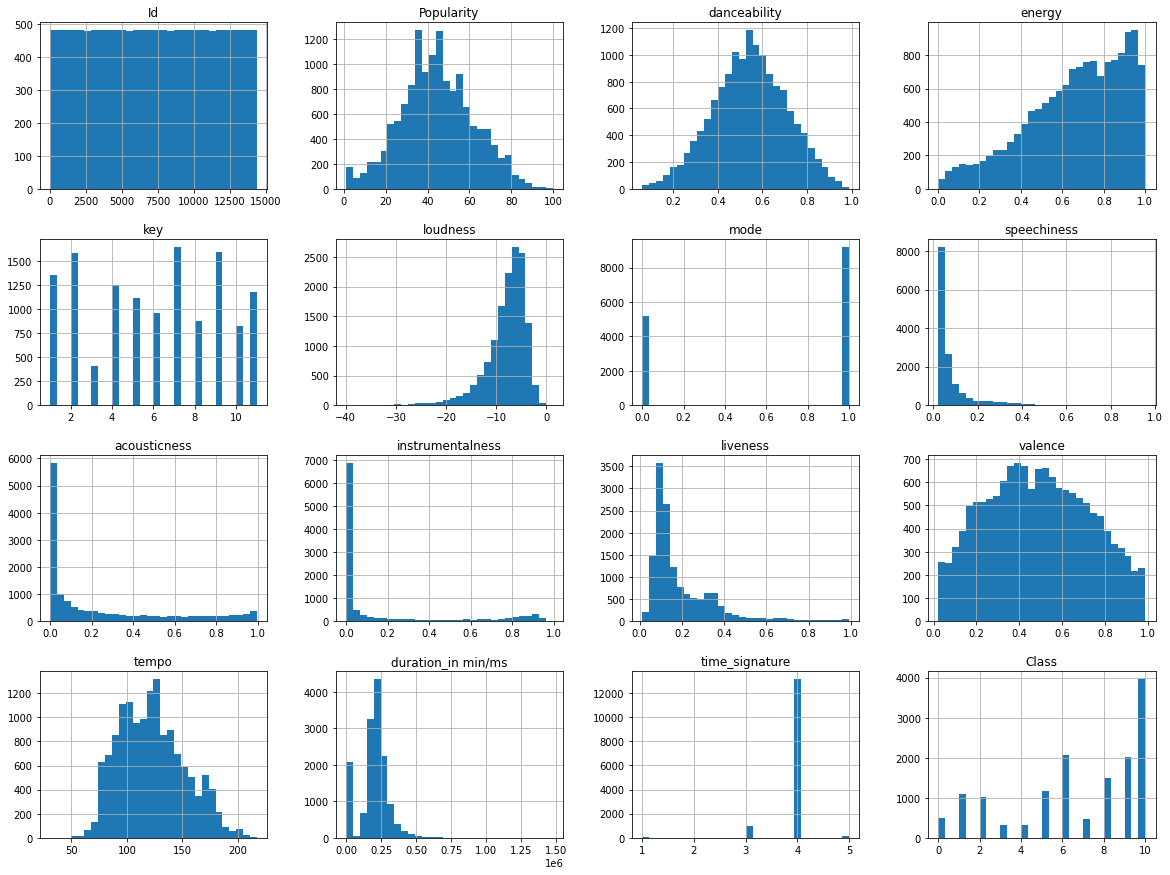

In [ ]:
#Plot histogram for all for each numerical attribute 
data.hist(bins=30, figsize=(20,15))
plt.show()

In [ ]:
data['Class'].unique()

array([ 9,  6, 10,  2,  5,  0,  8,  4,  3,  1,  7])

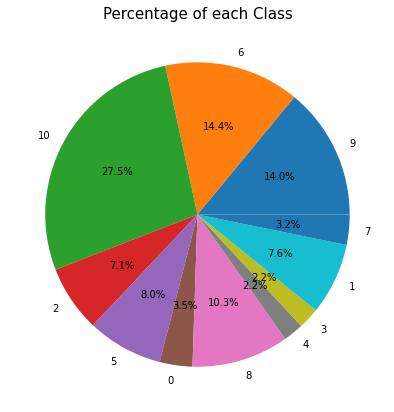

In [ ]:
#extarct the information
data2=data["Class"]
k3=data["Class"].unique()

g=[ (k3[i],data[data2==k3[i]].shape[0])  for i in range(len(k3)) ]

labels2,groups2=zip(*g)

# Create a pieplot
plt.figure(figsize=(7,7))

plt.pie(x=groups2, autopct="%.1f%%", labels=labels2, pctdistance=0.6)
plt.title("Percentage of each Class", fontsize=15);
plt.show()

Note:
* The labels are imbalance and lead to bais to some class more than others, need to handle this



In [ ]:
test_cleaning=test
data_cleaning=data

# Pre-processing 

In [ ]:
data_cleaning = data_cleaning.drop(['Track Name','Artist Name'],axis=1)

In [ ]:
test_cleaning = test_cleaning.drop(['Track Name','Artist Name'],axis=1)

In [ ]:
test_cleaning

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,17992,55.0,0.271,0.866,5.0,-4.072,0,0.0578,0.048900,0.000762,0.1160,0.127,175.665,267987.0,4
3596,17993,38.0,0.598,0.690,5.0,-4.758,0,0.3030,0.363000,NaN,0.0519,0.653,187.934,198300.0,4
3597,17994,18.0,0.783,0.820,1.0,-6.102,1,0.0489,0.000540,0.499000,0.0628,0.235,129.015,339213.0,4
3598,17995,38.0,0.443,0.401,5.0,-13.997,1,0.0426,0.263000,NaN,0.1680,0.751,168.209,182587.0,3


In [ ]:
data_cleaning

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.1060,0.235,152.429,204947.000000,4,9
1,2,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.046800,0.1040,0.380,132.921,191956.000000,4,6
2,3,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.635000,0.2840,0.635,159.953,161037.000000,4,10
3,4,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.021300,0.3000,0.501,172.472,298093.000000,3,2
4,5,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.2110,0.619,88.311,254145.000000,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,14392,47.0,0.607,0.946,1.0,-2.965,1,0.1500,0.005480,0.000390,0.2780,0.653,120.011,195181.000000,4,10
14392,14393,27.0,0.435,0.951,8.0,-7.475,1,0.0576,0.000005,0.550000,0.0952,0.203,135.034,282043.000000,4,8
14393,14394,22.0,0.415,0.941,11.0,-4.300,1,0.0524,0.001810,0.000004,0.3370,0.572,167.978,176529.000000,4,10
14394,14395,37.0,0.493,0.986,1.0,-2.279,1,0.0917,0.000967,0.006620,0.1230,0.567,122.036,186307.000000,4,10


In [ ]:
data.shape

(14396, 18)

In [ ]:
data_cleaning.isnull().sum()

Id                       0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [ ]:
data_cleaning['Popularity'] = data_cleaning['Popularity'].fillna(0)
data_cleaning['key'] = data_cleaning['key'].fillna(0)
data_cleaning['instrumentalness'] = data_cleaning['instrumentalness'].fillna(0)

test_cleaning['Popularity'] = test_cleaning['Popularity'].fillna(0)
test_cleaning['key'] = test_cleaning['key'].fillna(0)
test_cleaning['instrumentalness'] = test_cleaning['instrumentalness'].fillna(0)

In [ ]:
# find mean to replace zero values
mean_instrument = data_cleaning['instrumentalness'].mean()
mean_key = data_cleaning['key'].mean()
mean_popularity = data_cleaning['Popularity'].mean()

In [ ]:
data_cleaning['Popularity'].unique()

array([ 37.,  67.,   0.,  12.,  48.,  38.,  11.,  45.,  58.,  68.,  51.,
        57.,  19.,  70.,  47.,  25.,  61.,  10.,   4.,  50.,  62.,  28.,
        14.,  21.,  36.,  34.,   1.,  55.,  31.,  32.,   3.,  60.,  39.,
        65.,  44.,  40.,  71.,  54.,  46.,  89.,  63.,  49.,  92.,  26.,
        52.,  16.,  33.,  41.,   9.,  42.,  23.,  29.,  77.,  18.,  73.,
        66.,  69.,   8.,  22.,  30.,  43.,  27.,  82.,  64.,  59.,  56.,
        35.,  24.,  72., 100.,  80.,  17.,  53.,  85.,  88.,  20.,  86.,
        78.,   2.,  83.,  15.,  90.,  95.,  74.,  79.,  13.,  76.,   5.,
        93.,  75.,   7.,  81.,  96.,   6.,  91.,  87.,  84.,  97.,  94.,
        98.,  99.])

In [ ]:
data_cleaning['key'].unique()

array([ 9., 11.,  7.,  0.,  6.,  1.,  5., 10.,  4.,  2.,  3.,  8.])

In [ ]:
data_cleaning['instrumentalness'].unique()

array([0.00e+00, 4.68e-02, 6.35e-01, ..., 9.83e-03, 9.41e-05, 5.50e-01])

In [ ]:
# fill zero values to mean values
data_cleaning['instrumentalness'] = data_cleaning['instrumentalness'].replace(0,mean_instrument)
data_cleaning['key'] = data_cleaning['key'].replace(0,mean_key)
data_cleaning['Popularity'] = data_cleaning['Popularity'].replace(0,mean_popularity)

#fill test zero values to mean values of train 
test_cleaning['instrumentalness'] = test_cleaning['instrumentalness'].replace(0,mean_instrument)
test_cleaning['key'] = test_cleaning['key'].replace(0,mean_key)
test_cleaning['Popularity'] = test_cleaning['Popularity'].replace(0,mean_popularity)

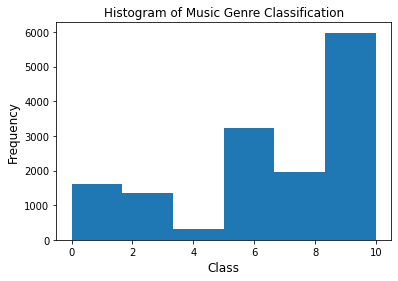

In [ ]:
 #specify the bins (bar) for histogram

plt.hist(data_cleaning['Class'], bins=6)

#define labels and title

plt.title('Histogram of Music Genre Classification')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

# heatmap correlation

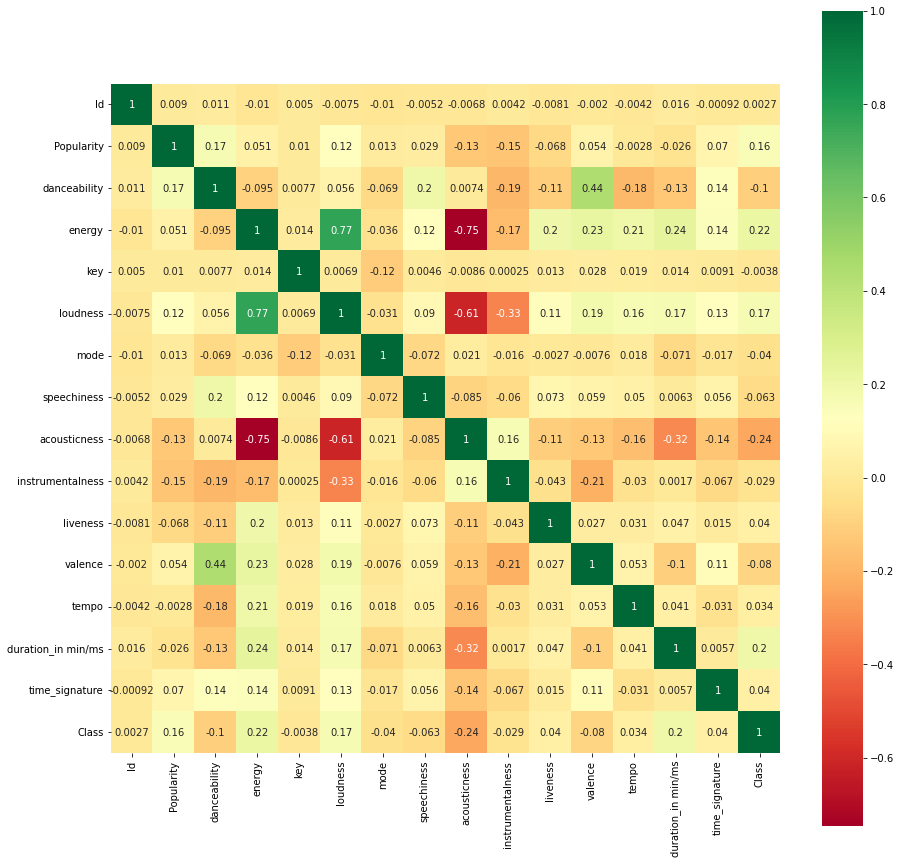

In [ ]:
plt.figure(figsize=(15,15))  # on this line I just set the size of figure to 15 by 15.
p=sns.heatmap(data_cleaning.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

we can notice that:

"energy" correlated with "loudness" with 0.77

"energy" correlated with "acousticeness" with -0.75

"acousticeness" correlated with "loudness" -0.61

In [ ]:
# How each feature affects the Class of Music
correlations = data_cleaning.corr()
correlations["Class"].sort_values(ascending=False)

Class                 1.000000
energy                0.215611
duration_in min/ms    0.203822
loudness              0.174111
Popularity            0.157194
liveness              0.040101
time_signature        0.040053
tempo                 0.034496
Id                    0.002703
key                  -0.003841
instrumentalness     -0.029280
mode                 -0.040092
speechiness          -0.062784
valence              -0.080036
danceability         -0.101152
acousticness         -0.240609
Name: Class, dtype: float64

scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
data_scale = scale.fit_transform(data_cleaning[['energy','duration_in min/ms','loudness','Popularity','time_signature','tempo','Id','liveness','key','instrumentalness','mode','speechiness','valence','danceability','acousticness']])
scaling =  pd.DataFrame(data_scale,columns=['energy','duration_in min/ms','loudness','Popularity','time_signature','tempo','Id','liveness','key','instrumentalness','mode','speechiness','valence','danceability','acousticness'],index=data_cleaning.index)
scaling.head()

,energy,duration_in min/ms,loudness,Popularity,time_signature,tempo,Id,liveness,key,instrumentalness,mode,speechiness,valence,danceability,acousticness
0,-0.535777,0.043450,0.308549,-0.435712,0.210416,1.006641,-1.731930,-0.563774,1.032267,-0.124731,-1.334049,-0.494173,-1.049740,-1.263390,0.422160
1,0.358445,-0.072868,0.580657,1.306814,0.210416,0.346192,-1.731690,-0.576333,1.693850,-0.455136,0.749598,0.087129,-0.444231,1.098986,-0.706136
2,0.600012,-0.349708,0.445342,-0.058439,0.210416,1.261369,-1.731449,0.553950,0.370683,1.765581,0.749598,-0.214678,0.620630,0.247081,-0.790508
3,-1.502046,0.877455,-1.678525,-1.887817,-2.571167,1.685203,-1.731209,0.654419,-0.195519,-0.551410,0.749598,-0.575203,0.061056,-0.169809,2.123611
4,0.485585,0.483956,0.691323,0.203214,0.210416,-1.164094,-1.730968,0.095557,0.039891,-0.124731,-1.334049,1.982527,0.553815,0.132285,-0.205029


In [ ]:
#scaling test data
scaler = StandardScaler()
scaler.fit_transform(test_cleaning)

array([[-1.73156975, -0.05449992,  0.86422368, ..., -1.08984556,
        -0.02956139,  0.20877391],
       [-1.7306075 , -1.76659119, -0.49484441, ...,  1.37056778,
         0.71205412,  0.20877391],
       [-1.72964525,  2.06446373,  0.65740897, ..., -0.6182871 ,
         0.25797603,  0.20877391],
       ...,
       [ 1.72964525, -1.53440604,  1.40785092, ...,  0.22490226,
         1.20084918,  0.20877391],
       [ 1.7306075 , -0.37348031, -0.60120626, ...,  1.54449832,
        -0.18346325, -2.49477311],
       [ 1.73156975,  1.42595458,  0.76967982, ..., -0.00357095,
        -0.1379812 ,  0.20877391]])

# Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

**make display function to show the resultant scores and calculate its Mean and Standard deviation for each model**

In [ ]:
def display(scores):
  print("scores",scores)
  print("Mean",scores.mean())
  print("Standard deviation",scores.std())

**split data into train & test**

In [ ]:
#split diamond data into data & labels
from sklearn.model_selection import train_test_split
train_data ,test_data = train_test_split(data_cleaning,test_size = 0.2,random_state = 42 )

Split data into data & labels

In [ ]:
train__data = train_data.drop(['Class'],axis=1)
train_labels = train_data['Class']

In [ ]:
test__data = test_data.drop(['Class'],axis=1)
test_labels = test_data['Class']

# SVM Model

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_clf.fit(train__data,train_labels)

SVC(probability=True)

validation

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(svm_clf, train__data, train_labels, cv=10, scoring="f1_macro")

array([0.07935649, 0.07528768, 0.07714584, 0.07767039, 0.07929365,
       0.07744861, 0.07828761, 0.07884981, 0.07694715, 0.0787107 ])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred_1 = cross_val_predict(svm_clf, train__data, train_labels, cv=3)
conf_mx = confusion_matrix(train_labels, y_train_pred_1)
conf_mx

array([[ 396,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  894],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0,  782],
       [ 254,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 242,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  921],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1666],
       [ 374,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0, 1190],
       [ 267,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1346],
       [ 117,    0,    0,    0,    0,    0,    3,    0,    0,    0, 3062]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_labels, y_train_pred_1))

              precision    recall  f1-score   support

           0       0.24      1.00      0.39       396
           1       0.00      0.00      0.00       894
           2       0.00      0.00      0.00       783
           3       0.00      0.00      0.00       254
           4       0.00      0.00      0.00       242
           5       0.00      0.00      0.00       921
           6       0.00      0.00      0.00      1666
           7       0.00      0.00      0.00       374
           8       0.00      0.00      0.00      1191
           9       0.00      0.00      0.00      1613
          10       0.31      0.96      0.47      3182

    accuracy                           0.30     11516
   macro avg       0.05      0.18      0.08     11516
weighted avg       0.09      0.30      0.14     11516



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(train__data,train_labels)

RandomForestClassifier(random_state=42)

**validation**

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(random_forest, train__data, train_labels, cv=10, scoring="f1_macro")


array([0.56989412, 0.5289329 , 0.54278126, 0.54633164, 0.57650283,
       0.56285342, 0.5458053 , 0.55968084, 0.58590502, 0.55185046])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred_1 = cross_val_predict(random_forest, train__data, train_labels, cv=3)
conf_mx = confusion_matrix(train_labels, y_train_pred_1)
conf_mx

array([[ 305,    0,    0,   21,   29,    0,    0,   13,    0,   25,    3],
       [   0,   20,   24,    0,    0,   37,  266,    0,   23,   72,  452],
       [   0,    4,  252,    0,    0,   22,   89,    0,    6,   65,  345],
       [  43,    0,    0,  187,    9,    0,    0,   10,    0,    4,    1],
       [  56,    0,    0,    5,  136,    0,    0,    1,    0,   34,   10],
       [   0,    4,   12,    0,    0,  657,   42,    0,    1,  133,   72],
       [   0,  138,   49,    0,    0,   81,  467,    0,   54,  176,  701],
       [  22,    0,    0,    7,    1,    0,    0,  344,    0,    0,    0],
       [   0,    2,    2,    0,    0,    1,   44,    0,  619,    5,  518],
       [  35,   16,   42,    4,   14,  146,  105,    0,    2,  849,  400],
       [  11,  107,  106,    8,   25,   36,  263,    0,  276,  262, 2088]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_labels, y_train_pred_1))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70       396
           1       0.07      0.02      0.03       894
           2       0.52      0.32      0.40       783
           3       0.81      0.74      0.77       254
           4       0.64      0.56      0.60       242
           5       0.67      0.71      0.69       921
           6       0.37      0.28      0.32      1666
           7       0.93      0.92      0.93       374
           8       0.63      0.52      0.57      1191
           9       0.52      0.53      0.52      1613
          10       0.45      0.66      0.54      3182

    accuracy                           0.51     11516
   macro avg       0.57      0.55      0.55     11516
weighted avg       0.49      0.51      0.50     11516



# KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=11)
knn_clf.fit(train__data, train_labels)

KNeighborsClassifier(n_neighbors=11)

**validation**

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf,train__data, train_labels, cv=10, scoring="f1_macro")


array([0.19774326, 0.18596756, 0.16450335, 0.1836087 , 0.20751228,
       0.19620116, 0.19028532, 0.17722458, 0.17474232, 0.18740421])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred_1 = cross_val_predict(knn_clf, train__data, train_labels, cv=3)
conf_mx = confusion_matrix(train_labels, y_train_pred_1)
conf_mx

array([[ 166,    0,    0,   56,   38,    0,    0,  100,    0,   33,    3],
       [   0,   81,   32,    0,    0,   68,  139,    0,   72,   97,  405],
       [   0,   50,   31,    0,    0,   51,  117,    0,  102,   80,  352],
       [ 102,    0,    0,   45,   17,    0,    0,   61,    0,   29,    0],
       [ 109,    0,    0,   30,   30,    0,    0,   54,    0,   18,    1],
       [   0,   59,   32,    0,    0,   98,  175,    0,   66,   92,  399],
       [   0,   90,   63,    0,    0,  124,  307,    0,  142,  175,  765],
       [ 133,    0,    0,   56,   31,    0,    0,  113,    0,   37,    4],
       [   0,   63,   50,    0,    0,   46,  189,    0,  158,   96,  589],
       [ 123,   98,   39,   48,   24,  105,  249,   53,   90,  191,  593],
       [  53,  164,  121,   15,   13,  176,  548,   28,  334,  308, 1422]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_labels, y_train_pred_1))

              precision    recall  f1-score   support

           0       0.24      0.42      0.31       396
           1       0.13      0.09      0.11       894
           2       0.08      0.04      0.05       783
           3       0.18      0.18      0.18       254
           4       0.20      0.12      0.15       242
           5       0.15      0.11      0.12       921
           6       0.18      0.18      0.18      1666
           7       0.28      0.30      0.29       374
           8       0.16      0.13      0.15      1191
           9       0.17      0.12      0.14      1613
          10       0.31      0.45      0.37      3182

    accuracy                           0.23     11516
   macro avg       0.19      0.19      0.19     11516
weighted avg       0.21      0.23      0.21     11516



# Fine Tuning The model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [3,10,30], 'max_features':[8,10,15,20]},
              {'bootstrap':[False], 'max_features':[2,3,4],'n_estimators':[3,10]}
]
random_forest = RandomForestClassifier()

grid_search = GridSearchCV(random_forest,param_grid,cv = 5, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(train__data, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [8, 10, 15, 20],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_features=10, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.296238915218767 {'max_features': 8, 'n_estimators': 3}
3.7468185089733934 {'max_features': 8, 'n_estimators': 10}
3.5515313373507347 {'max_features': 8, 'n_estimators': 30}
4.283222369336889 {'max_features': 10, 'n_estimators': 3}
3.720600843510342 {'max_features': 10, 'n_estimators': 10}
3.547546618311649 {'max_features': 10, 'n_estimators': 30}
4.268775257021982 {'max_features': 15, 'n_estimators': 3}
3.7332519845464667 {'max_features': 15, 'n_estimators': 10}
3.57039322948866 {'max_features': 15, 'n_estimators': 30}
nan {'max_features': 20, 'n_estimators': 3}
nan {'max_features': 20, 'n_estimators': 10}
nan {'max_features': 20, 'n_estimators': 30}
4.33622140935287 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.7737920599492365 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.30830228140608 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.7485642987518273 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
4.242814413694852 {'bootstrap

In [ ]:
y_train_pred_12 = cross_val_predict(grid_search, train__data, train_labels, cv=3)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

# Ensemble-Learning

# Voting Classifiers


**Hard VotingClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42,max_iter=10000)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf),('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [ ]:
voting_clf.fit(train__data, train_labels)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(train__data, train_labels)
    y_pred = clf.predict(test__data)
    print(clf.__class__.__name__, accuracy_score(test_labels, y_pred))

LogisticRegression 0.30104166666666665
RandomForestClassifier 0.5013888888888889
SVC 0.296875
VotingClassifier 0.3284722222222222


**Soft VotingClassifier**

In [ ]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42,max_iter=10000)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(train__data, train_labels)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(train__data, train_labels)
    y_pred = clf.predict(test__data)
    print(clf.__class__.__name__, accuracy_score(test_labels, y_pred))

LogisticRegression 0.30104166666666665
RandomForestClassifier 0.5013888888888889
SVC 0.296875
VotingClassifier 0.4513888888888889


# Evaluating on test set

In [ ]:
from sklearn import *
predictions =pd.Series(grid_search.predict(test_cleaning))

In [ ]:
predictions.shape


(3600,)

In [ ]:
test_cleaning['Id'].shape

(3600,)

In [ ]:
pred = pd.DataFrame({"Id":test_cleaning["Id"],"Class":predictions})

In [ ]:
pred.to_csv("submission.csv", index=False)